In [1]:
import re
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
reddit_data = pd.read_csv("/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Reddit_Science_Parenting/data/processed_reddit_data.csv")

# _TOPIC MODELLING_

___Gensim = “Generate Similar”___ is a popular open source natural language processing (NLP) library used for unsupervised topic modeling. It uses top academic models and modern statistical machine learning to perform various complex tasks such as −

Building document or word vectors

__Corpora__

Performing topic identification

Performing document comparison (retrieving semantically similar documents)

Analysing plain-text documents for semantic structure

In [ ]:
#defining the function to remove punctuation
def remove_punct(text):
    punctuationfree= [i for i in text if i not in ["\'\'","``"]]
    return punctuationfree
#storing the puntuation free text
reddit_data['clean_title_content'] = reddit_data['clean_title_content'].apply(lambda x:remove_punct(x))
reddit_data.head(5)

,id,title,content,date,parent,url,links url,number_of_upvotes,number_of_replies,StudyID,title_content,title_content_lower,title_content_tokenized,title_content_noSW,clean_title_content,clean_title_content_stemmed,clean_title_content_lemmatized
2,0_88469_126_t3_p4op8d,Best age for learning a second language?,Does anyone know of research on this? We reall...,2021-08-15 01:54:03,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,26,13,3,Best age for learning a second language?Does a...,best age for learning a second language?does a...,"[best, age, for, learning, a, second, language...","[best, age, learning, second, language, ?, kno...","[best, age, learning, second, language, know, ...","[best, age, learn, second, languag, know, rese...","[best, age, learn, second, languag, know, rese..."
39,0_88469_126_t3_p5f4ea,Zofran while pregnant?,What's the evidence based data on Zofran risks...,2021-08-16 07:31:39,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,31,44,30,Zofran while pregnant?What's the evidence base...,zofran while pregnant?what's the evidence base...,"[zofran, while, pregnant, ?, what, 's, the, ev...","[zofran, pregnant, ?, evidence, based, data, z...","[zofran, pregnant, evidence, based, data, zofr...","[zofran, pregnant, evid, base, data, zofran, r...","[zofran, pregnant, evid, base, data, zofran, r..."
51,0_88469_126_t3_p5maej,17-year study of children associates poverty w...,,2021-08-16 13:43:19,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,10,0,40,17-year study of children associates poverty w...,17-year study of children associates poverty w...,"[17-year, study, of, children, associates, pov...","[17-year, study, children, associates, poverty...","[17-year, study, children, associates, poverty...","[17-year, studi, children, associ, poverti, sm...","[17-year, studi, child, associ, poverti, small..."
52,0_88469_126_t3_p5mb60,"Just 10% of kids with ADHD outgrow it, study f...",,2021-08-16 13:44:27,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,24,0,40,"Just 10% of kids with ADHD outgrow it, study f...","just 10% of kids with adhd outgrow it, study f...","[just, 10, %, of, kids, with, adhd, outgrow, i...","[10, %, kids, adhd, outgrow, ,, study, finds]","[10, kids, adhd, outgrow, study, finds]","[10, kid, adhd, outgrow, studi, find]","[10, kid, adhd, outgrow, studi, find]"
53,0_88469_126_t3_p5mcxo,Study shows differences in rapidly processing ...,,2021-08-16 13:46:59,0,https://www.reddit.com/r/ScienceBasedParenting...,NaN,4,0,40,Study shows differences in rapidly processing ...,study shows differences in rapidly processing ...,"[study, shows, differences, in, rapidly, proce...","[study, shows, differences, rapidly, processin...","[study, shows, differences, rapidly, processin...","[studi, show, differ, rapidli, process, sensor...","[studi, show, differ, rapidli, process, sensor..."


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(reddit_data['clean_title_content'])

___BAG OF WORDS___

id2word.doc2bow method assigns a value throughout the corpus to each word, and the frequency for which that word is seen within the document.

In [ ]:
corpus = [id2word.doc2bow(text) for text in reddit_data['clean_title_content']]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


Next we will incorporate the filter_extremes function, set to remove tokens with a frequency of no values less than 3 characters, and seen more than 95% of total corpus.

In [ ]:
id2word.filter_extremes(no_below=3, no_above=0.99)
corpus = [id2word.doc2bow(text) for text in reddit_data['clean_title_content']]

___LATENT DIRICHLET ALLOCATION (LDA)___ is a generative statistical model that explains a set of observations through unobserved groups, and each group explains why some parts of the data are similar. The LDA is an example of a topic model.

Initially we are building a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [ ]:
import gensim
from pprint import pprint
# number of topics
num_topics = 9
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=42,
                                       passes = 10,
                                       alpha="auto")
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"evidence" + 0.010*"sleep" + 0.009*"like" + 0.009*"people" + '
  '0.008*"studies" + 0.007*"study" + 0.007*"research" + 0.007*"year" + '
  '0.006*"know" + 0.006*"based"'),
 (1,
  '0.013*"kids" + 0.013*"research" + 0.011*"like" + 0.009*"time" + '
  '0.009*"studies" + 0.009*"child" + 0.009*"baby" + 0.007*"old" + '
  '0.007*"formula" + 0.006*"study"'),
 (2,
  '0.026*"covid" + 0.024*"children" + 0.015*"vaccine" + 0.011*"data" + '
  '0.011*"study" + 0.010*"time" + 0.008*"research" + 0.007*"like" + '
  '0.007*"vaccinated" + 0.006*"evidence"'),
 (3,
  '0.014*"old" + 0.013*"time" + 0.011*"research" + 0.009*"know" + '
  '0.009*"daycare" + 0.008*"year" + 0.008*"months" + 0.007*"little" + '
  '0.007*"child" + 0.006*"like"'),
 (4,
  '0.018*"research" + 0.015*"children" + 0.014*"time" + 0.014*"child" + '
  '0.011*"parenting" + 0.010*"study" + 0.009*"parents" + 0.009*"like" + '
  '0.008*"screen" + 0.006*"studies"'),
 (5,
  '0.022*"pregnant" + 0.021*"baby" + 0.015*"breastfeeding" + 0.011

In [ ]:
len(doc_lda)

711

In [ ]:
import gensim
from pprint import pprint
# number of topics
num_topics = 9
# Build LDA model
ldaMulticore_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=42,
                                       passes = 10)
# Print the Keyword in the 10 topics
pprint(ldaMulticore_model.print_topics())
doc_ldaMulticore = ldaMulticore_model[corpus]

[(0,
  '0.011*"evidence" + 0.011*"like" + 0.008*"people" + 0.008*"research" + '
  '0.007*"know" + 0.007*"studies" + 0.007*"year" + 0.007*"study" + '
  '0.006*"information" + 0.006*"old"'),
 (1,
  '0.016*"kids" + 0.014*"like" + 0.012*"time" + 0.011*"research" + '
  '0.008*"studies" + 0.008*"baby" + 0.007*"child" + 0.007*"daycare" + '
  '0.007*"old" + 0.006*"language"'),
 (2,
  '0.027*"covid" + 0.017*"children" + 0.010*"data" + 0.010*"research" + '
  '0.010*"vaccinated" + 0.009*"evidence" + 0.009*"vaccine" + 0.008*"old" + '
  '0.008*"like" + 0.007*"time"'),
 (3,
  '0.012*"time" + 0.012*"old" + 0.011*"research" + 0.010*"know" + 0.008*"year" '
  '+ 0.007*"study" + 0.007*"milk" + 0.007*"child" + 0.007*"months" + '
  '0.007*"help"'),
 (4,
  '0.022*"children" + 0.019*"research" + 0.017*"study" + 0.015*"child" + '
  '0.014*"time" + 0.011*"parenting" + 0.010*"parents" + 0.008*"screen" + '
  '0.008*"survey" + 0.007*"like"'),
 (5,
  '0.022*"baby" + 0.020*"breastfeeding" + 0.018*"pregnant" + 0.012

___Analyzing LDA model results___

__Computing Perplexity and Coherence scores__

Perplexity is a measurement of how well a probability distribution or probability model predicts a sample. It may be used to compare probability models. A low perplexity indicates the probability distribution is good at predicting the sample.

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
print('\nPerplexity: ', ldaMulticore_model.log_perplexity(corpus))  



Perplexity:  -7.39277536094748

Perplexity:  -7.400082809065345


The coherence score is used in assessing the quality of the learned topics, the closer to 1 the better


In [ ]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=reddit_data['clean_title_content'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Basic Ldamodel Coherence Score: ', coherence_lda)

coherence_model_ldaMulticore = CoherenceModel(model=ldaMulticore_model, texts=reddit_data['clean_title_content'], dictionary=id2word, coherence='c_v')
coherence_ldaMulticore = coherence_model_ldaMulticore.get_coherence()
print('\n Basic LdaMulticore model Coherence Score: ', coherence_ldaMulticore)


 Basic Ldamodel Coherence Score:  0.28492328371209763

 Basic LdaMulticore model Coherence Score:  0.28136747637755105


Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and

2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [ ]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = '/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Reddit_Science_Parenting/results/ldavis_prepared_'+str(num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')
LDAvis_prepared

/opt/homebrew/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the im

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.008237 -0.005549       1        1  18.458269
4     -0.004049 -0.000182       2        1  16.976299
2     -0.009972 -0.006682       3        1  16.166877
6      0.001735  0.017563       4        1  15.047833
8     -0.002363  0.007771       5        1  10.057788
1      0.008851  0.032004       6        1   8.291970
3      0.053691  0.010547       7        1   5.720151
7     -0.053699  0.002890       8        1   5.014534
5      0.014042 -0.058362       9        1   4.266279, topic_info=         Term        Freq       Total Category  logprob  loglift
21   research  364.000000  364.000000  Default  30.0000  30.0000
40   evidence  282.000000  282.000000  Default  29.0000  29.0000
279     sleep  241.000000  241.000000  Default  28.0000  28.0000
67       kids  187.000000  187.000000  Default  27.0000  27.0000
63      study  231.000000  231.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
211      baby    7.318747  410.436400   Topic9  -5.3703  -0.8724
125     child    5.692596  203.272879   Topic9  -5.6216  -0.4210
754    things    4.960285  103.489446   Topic9  -5.7593   0.1164
28       want    4.747610  120.443733   Topic9  -5.8031  -0.0791
72     people    4.813354  156.107660   Topic9  -5.7894  -0.3247

[678 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1082      2  0.405930   ....
1082      3  0.135310   ....
1082      4  0.135310   ....
1082      5  0.405930   ....
1289      4  0.228358  10-25
...     ...       ...    ...
899       5  0.103643  years
899       6  0.069095  years
899       7  0.023032  years
899       8  0.034548  years
899       9  0.023032  years

[2363 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 7, 9, 2, 4, 8, 6])

The interactive visualization comes in the form of a plot (left) and a horizontal bar chart (right).

Each bubble in the plot represents a topic. The size of the bubble represents the proportion of reviews that contain the topic, with a larger bubble corresponding to a higher proportion. The distance between the bubbles represents the similarity between the topics; the shorter the distance, the more similar the topics.

The bars in the bar chart represent the term frequency for each of the words. The blue bars show the overall term frequency in the collection of documents, whereas the red bars show the term frequency for the selected topic.

## Finding Optimum number of Topics ##

In [ ]:
def compute_performance(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence and perplexity for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    perplexity_values : Perplexity values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    perplexity_values = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                num_topics=num_topics, 
                                                id2word=id2word,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=reddit_data['clean_title_content'], dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity = model.log_perplexity(corpus)
        perplexity_values.append(perplexity)

    return model_list, coherence_values, perplexity_values

In [ ]:
model_list, coherence_values, perplexity_values = compute_performance(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=reddit_data['clean_title_content'], 
                                                        start=2, limit=30, step=1)

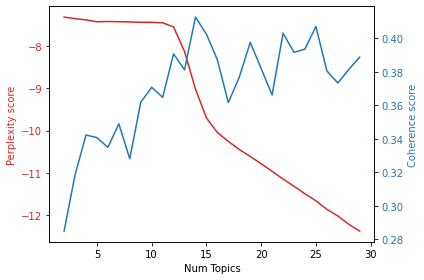

In [ ]:
# Show graph
limit=30; start=2; step=1;
x = range(start, limit, step)
fig, ax1 = plt.subplots()
color = 'tab:red'
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score", color=color)
ax1.plot(x, perplexity_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Coherence score', color=color)  # we already handled the x-label with ax1
ax2.plot(x, coherence_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

__Printing the coherence scores__

In [ ]:
count = 0
for m, cv, per in zip(x, coherence_values, perplexity_values):
    print('Model number: ', count, "Num Topics =", m, 
          " has Coherence Value of", round(cv, 3),
         " and Perplexity Valye of", round(per, 3))
    count += 1

Model number:  0 Num Topics = 2  has Coherence Value of 0.285  and Perplexity Valye of -7.321
Model number:  1 Num Topics = 3  has Coherence Value of 0.318  and Perplexity Valye of -7.358
Model number:  2 Num Topics = 4  has Coherence Value of 0.342  and Perplexity Valye of -7.388
Model number:  3 Num Topics = 5  has Coherence Value of 0.341  and Perplexity Valye of -7.431
Model number:  4 Num Topics = 6  has Coherence Value of 0.335  and Perplexity Valye of -7.425
Model number:  5 Num Topics = 7  has Coherence Value of 0.349  and Perplexity Valye of -7.429
Model number:  6 Num Topics = 8  has Coherence Value of 0.328  and Perplexity Valye of -7.435
Model number:  7 Num Topics = 9  has Coherence Value of 0.362  and Perplexity Valye of -7.444
Model number:  8 Num Topics = 10  has Coherence Value of 0.371  and Perplexity Valye of -7.444
Model number:  9 Num Topics = 11  has Coherence Value of 0.365  and Perplexity Valye of -7.455
Model number:  10 Num Topics = 12  has Coherence Value of 

## _Hyperparameter Tuning_

We will perform a series of sensitivity tests to help determine the following model hyperparameters:

1. Number of Topics (K)
2. Dirichlet hyperparameter alpha: Document-Topic Density
3. Dirichlet hyperparameter beta: Word-Topic Density

We’ll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two different validation corpus sets. We’ll use C_v as our choice of metric for performance comparison

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=reddit_data['clean_title_content'], dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
#alpha.append('symmetric')
#alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
#beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

 53%|█████▎    | 288/540 [19:59<17:29,  4.16s/it]


In [ ]:
lda_tuning_results = pd.read_csv('/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Reddit_Science_Parenting/code/lda_tuning_results.csv')

In [ ]:
lda_tuning_results.columns

Index(['Validation_Set', 'Topics', 'Alpha', 'Beta', 'Coherence'], dtype='object')

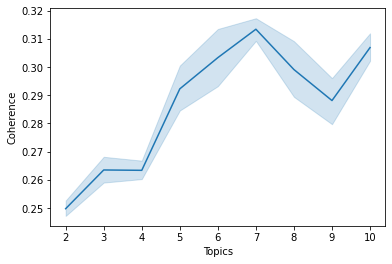

In [ ]:
sns.lineplot(data=lda_tuning_results, x="Topics", y="Coherence")
plt.show()

With the coherence score seems to keep increasing with the number of topics, it may make better sense to pick the model that gave the highest CV before a major drop. In this case, we picked K=7

In [ ]:
lda_tuning_results[lda_tuning_results['Topics'] == 7]

,Validation_Set,Topics,Alpha,Beta,Coherence
80,75% Corpus,7,0.01,0.01,0.305478
81,75% Corpus,7,0.01,0.31,0.293801
82,75% Corpus,7,0.01,0.61,0.295608
83,75% Corpus,7,0.01,0.91,0.312682
84,75% Corpus,7,0.31,0.01,0.292731
85,75% Corpus,7,0.31,0.31,0.309526
86,75% Corpus,7,0.31,0.61,0.309205
87,75% Corpus,7,0.31,0.91,0.318639
88,75% Corpus,7,0.61,0.01,0.304705
89,75% Corpus,7,0.61,0.31,0.298878


Next, we want to select the optimal alpha and beta parameters. While there are other sophisticated approaches to tackle the selection process, for this tutorial, we choose the values that yielded maximum C_v score for K=7

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.61,
                                           eta=0.9)
lda_model.show_topics()

[(0,
  '0.011*"kids" + 0.009*"evidence" + 0.008*"like" + 0.008*"research" + 0.007*"child" + 0.007*"know" + 0.006*"people" + 0.005*"based" + 0.005*"things" + 0.005*"way"'),
 (1,
  '0.011*"risk" + 0.009*"studies" + 0.009*"sids" + 0.008*"infant" + 0.007*"like" + 0.007*"study" + 0.006*"research" + 0.006*"article" + 0.005*"data" + 0.005*"baby"'),
 (2,
  '0.012*"children" + 0.010*"baby" + 0.009*"research" + 0.008*"child" + 0.008*"year" + 0.007*"old" + 0.006*"like" + 0.006*"studies" + 0.006*"know" + 0.005*"evidence"'),
 (3,
  '0.022*"sleep" + 0.014*"baby" + 0.009*"months" + 0.009*"time" + 0.007*"like" + 0.007*"old" + 0.006*"night" + 0.006*"evidence" + 0.006*"babies" + 0.006*"research"'),
 (4,
  '0.009*"research" + 0.006*"evidence" + 0.006*"like" + 0.006*"people" + 0.005*"information" + 0.005*"study" + 0.005*"sub" + 0.005*"parenting" + 0.004*"post" + 0.004*"school"'),
 (5,
  '0.018*"baby" + 0.009*"time" + 0.007*"food" + 0.007*"research" + 0.007*"like" + 0.007*"studies" + 0.006*"evidence" + 0.0

__Word Counts of Topic Keywords__

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_21710/277936031.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=60, horizontalalignment= 'right')


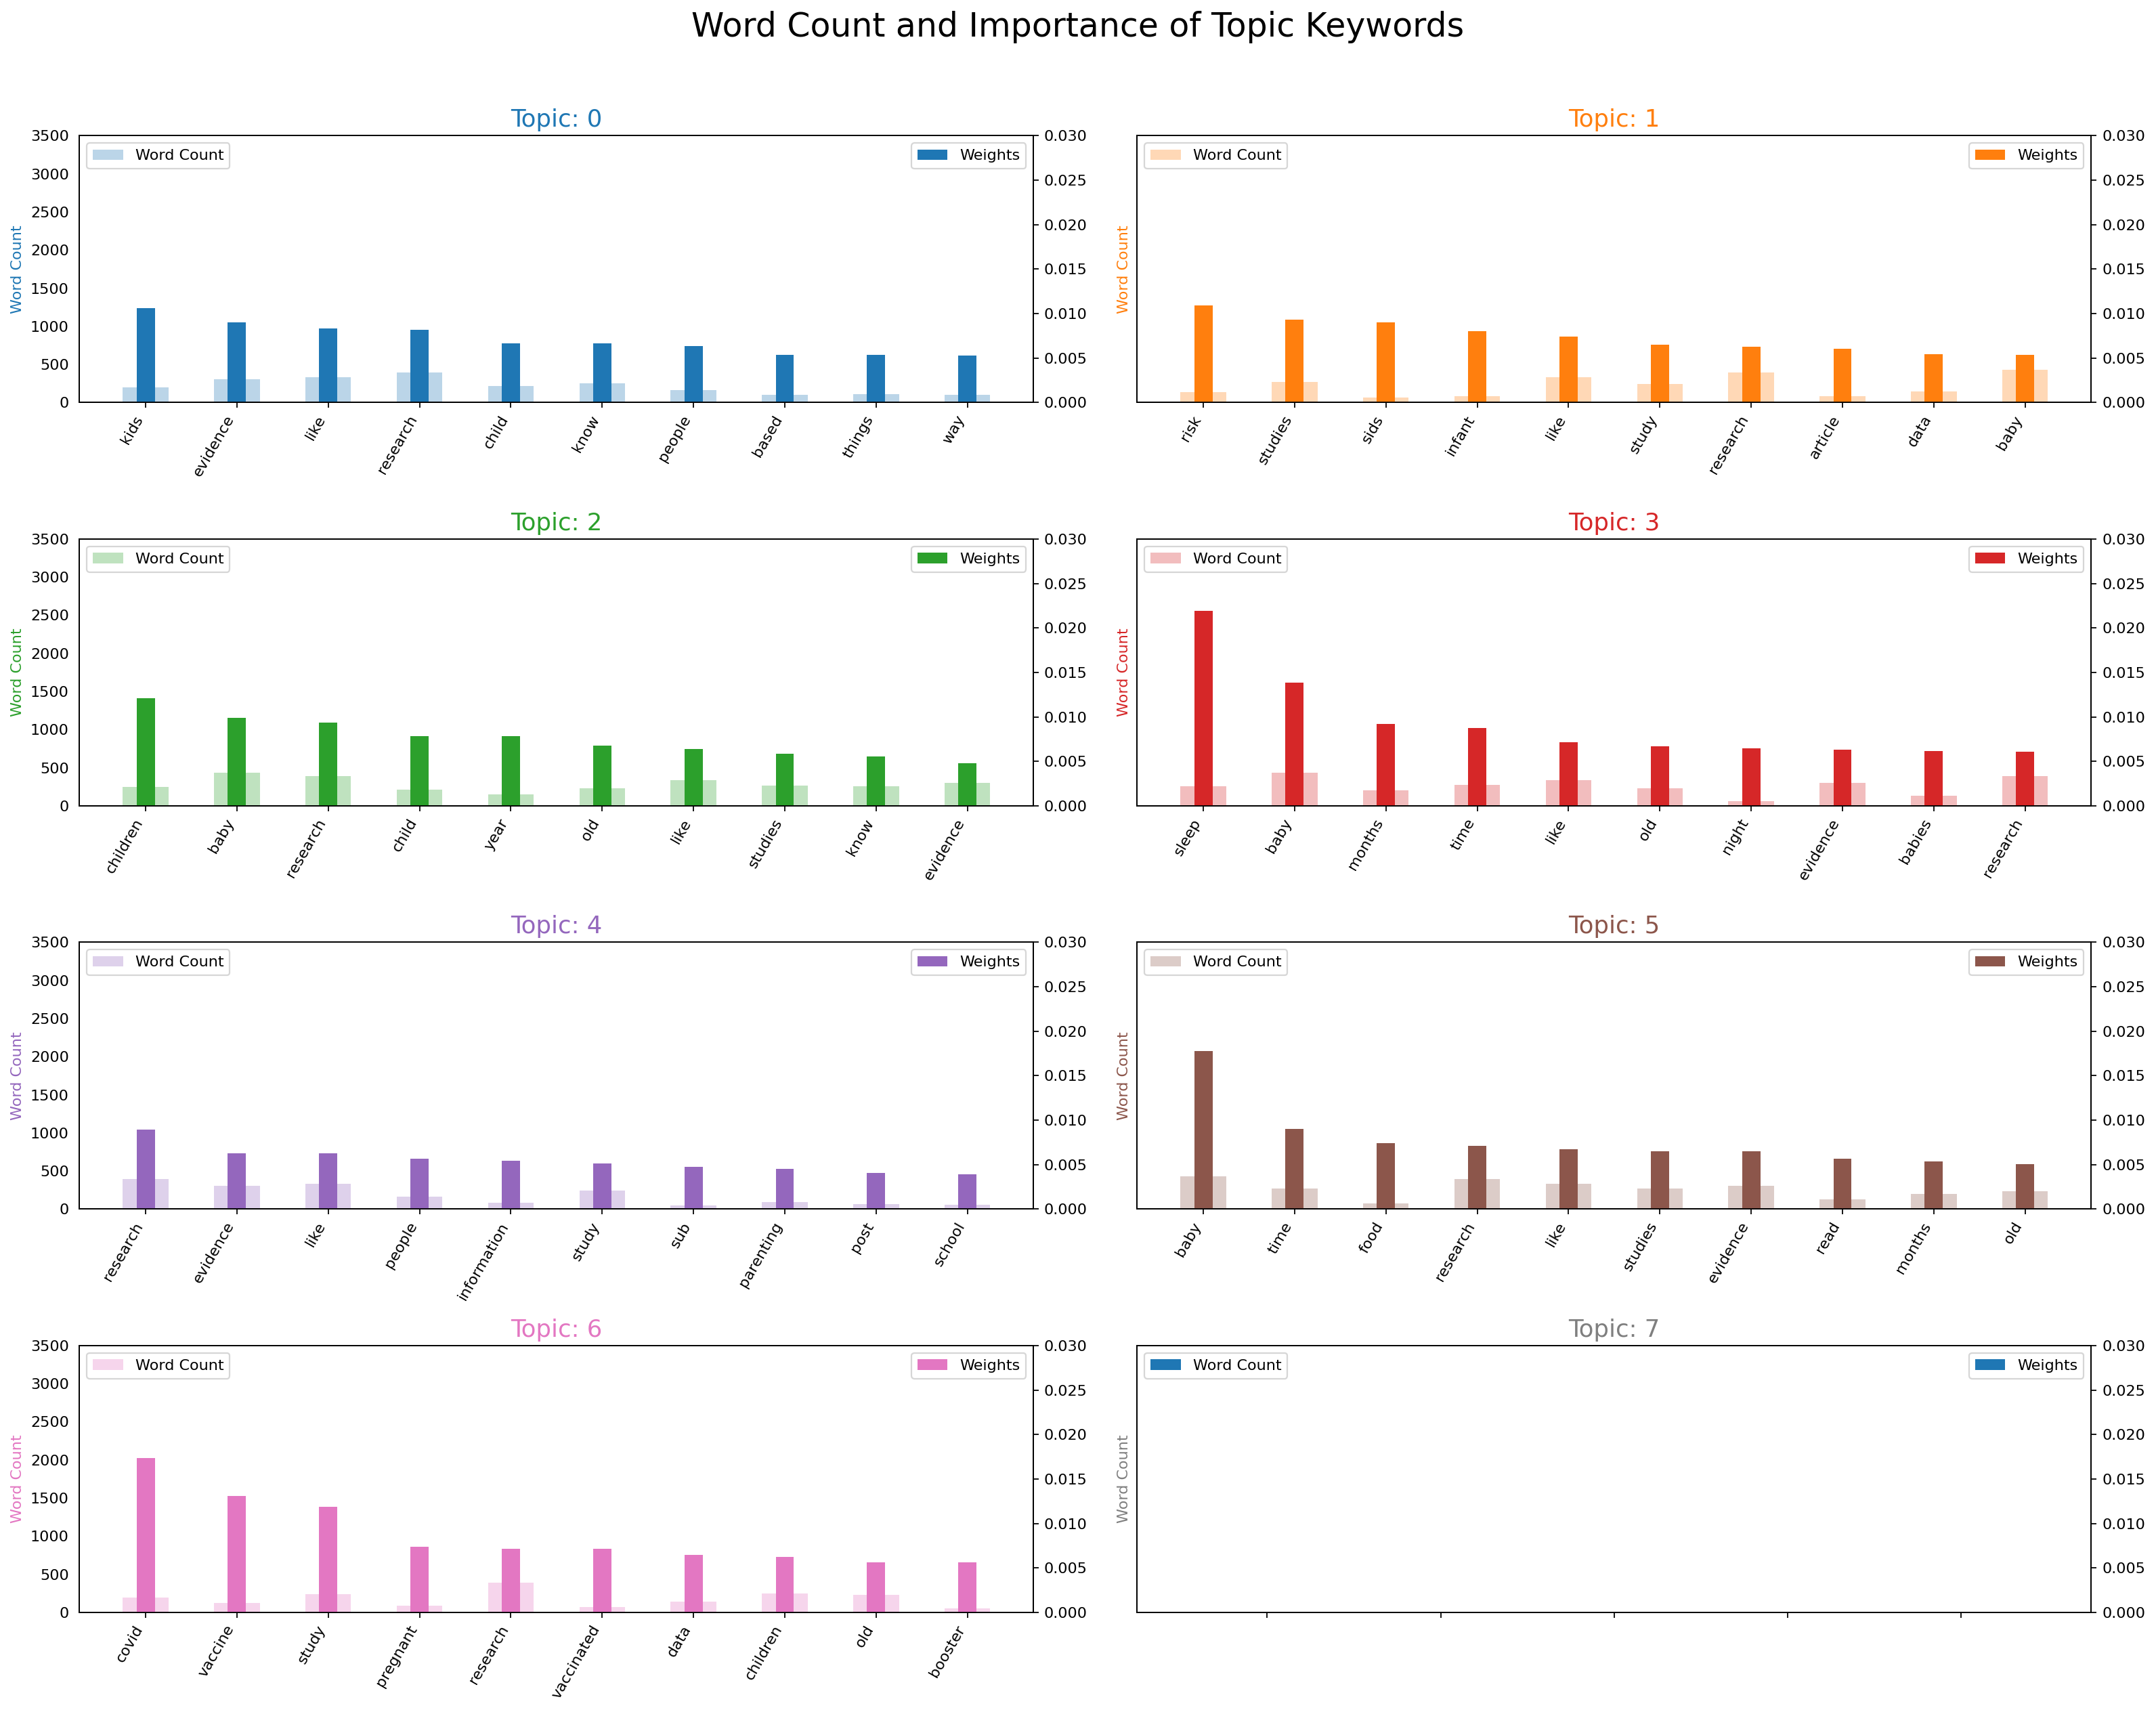

In [ ]:
from collections import Counter
import matplotlib.colors as mcolors

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in reddit_data['clean_title_content'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(20,15), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=60, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

__Referrences__

1. https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

2. https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0